# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [4]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [5]:
print("Info:")
print(df.info())

print("Description:")
df.describe()

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None
Description:


,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [6]:
# First way
first_3 = df.head(3)
print("first way:\n", first_3, "\n\n")

# Second way
first_3 = df.iloc[:3]
print("Second way:\n", first_3, "\n\n")

first way:
   animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no 


Second way:
   animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no 




```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [7]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [8]:
df[['animal', 'age']].iloc[[3,4,8],:]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [9]:
df[df.visits > 3]

,animal,age,visits,priority


```Select the rows where the age is missing, i.e. is `NaN`.```

In [10]:
df[np.isnan(df.age)]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [11]:
df[(df.animal == 'cat') & (df.age < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


```Select the rows the age is between 2 and 4 (inclusive).```

In [12]:
df[(2 <= df.age) & (df.age <= 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


```Change the age in row 'f' to 1.5.```

In [0]:
df.loc['f','age'] = 1.5

```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [14]:
# Using pandas
print(df.visits.sum())

# Using numpy
print(np.sum(df.visits))

19
19


```Calculate the mean age for each different animal in `df`.```

In [15]:
df[['animal','age']].groupby('animal').mean()

,age
animal,
cat,2.333333
dog,5.000000
snake,2.500000


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [16]:
df = df.append(pd.Series({'animal': 'dog', 'age': 16,'visits': 10, 'priority': False}, name='k'))

print(df)
print("\n")

df = df.drop('k')
print(df)

  animal   age  visits priority
a    cat   2.5       1      yes
b    cat   3.0       3      yes
c  snake   0.5       2       no
d    dog   NaN       3      yes
e    dog   5.0       2       no
f    cat   1.5       3       no
g  snake   4.5       1       no
h    cat   NaN       1      yes
i    dog   7.0       2       no
j    dog   3.0       1       no
k    dog  16.0      10    False


  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  1.5       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


```Count the number of each type of animal in `df`.```

In [17]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [18]:
df = df.sort_values(by=['age'], ascending=False)

df = df.sort_values(by=['visits'])

df

,animal,age,visits,priority
g,snake,4.5,1,no
j,dog,3.0,1,no
a,cat,2.5,1,yes
h,cat,NaN,1,yes
i,dog,7.0,2,no
e,dog,5.0,2,no
c,snake,0.5,2,no
b,cat,3.0,3,yes
f,cat,1.5,3,no
d,dog,NaN,3,yes


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [19]:
df['priority'] = df['priority'].apply(lambda x: x == 'yes')
df

,animal,age,visits,priority
g,snake,4.5,1,False
j,dog,3.0,1,False
a,cat,2.5,1,True
h,cat,NaN,1,True
i,dog,7.0,2,False
e,dog,5.0,2,False
c,snake,0.5,2,False
b,cat,3.0,3,True
f,cat,1.5,3,False
d,dog,NaN,3,True


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [20]:
df['animal'] = df['animal'].apply(lambda x: 'python' if x == 'snake' else x)
df

,animal,age,visits,priority
g,python,4.5,1,False
j,dog,3.0,1,False
a,cat,2.5,1,True
h,cat,NaN,1,True
i,dog,7.0,2,False
e,dog,5.0,2,False
c,python,0.5,2,False
b,cat,3.0,3,True
f,cat,1.5,3,False
d,dog,NaN,3,True


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [21]:
table = df.pivot_table(values='age', index=['animal'], columns=['visits'], aggfunc=np.mean)
table

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [22]:
my_data = {'age': np.random.randint(20, 65, 1000),
          'skill': np.random.normal(0.5, 0.3, 1000),
          'height': np.random.randint(150, 200, 1000)/100.0}

df2 = pd.DataFrame(my_data)
df2

,age,skill,height
0,45,0.127002,1.94
1,32,0.349748,1.82
2,37,0.522189,1.79
3,52,0.468323,1.72
4,48,0.376014,1.80
5,41,0.387948,1.50
6,52,1.202624,1.69
7,35,0.932951,1.84
8,56,0.780240,1.99
9,57,0.772536,1.80


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [23]:
df2['salary'] = df2.apply(lambda row: 1000*((row['age']**2)/1000.0 + 1.7*row['skill']+0.4*np.exp(-(row['height']-1.7)**2)), axis=1)
df2

,age,skill,height,salary
0,45,0.127002,1.94,2618.515108
1,32,0.349748,1.82,2012.853156
2,37,0.522189,1.79,2653.493875
3,52,0.468323,1.72,3899.988808
4,48,0.376014,1.80,3339.244103
5,41,0.387948,1.50,2724.826756
6,52,1.202624,1.69,5148.420950
7,35,0.932951,1.84,3203.252678
8,56,0.780240,1.99,4830.143116
9,57,0.772536,1.80,4958.330639


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [24]:
groups_by_age = df2.groupby(['age'])

for name, group in groups_by_age:
    print("age", name, ":")
    print("number of rows: %d" % (len(group)))
    print("mean salary: %f" % (group['salary'].mean()))
    print("maximum height: %f" % (group['height'].max()))
    print("\n")

age 20 :
number of rows: 20
mean salary: 1533.432519
maximum height: 1.990000


age 21 :
number of rows: 24
mean salary: 1751.634116
maximum height: 1.960000


age 22 :
number of rows: 27
mean salary: 1609.633493
maximum height: 1.970000


age 23 :
number of rows: 18
mean salary: 1633.487289
maximum height: 1.990000


age 24 :
number of rows: 20
mean salary: 1805.845410
maximum height: 1.990000


age 25 :
number of rows: 29
mean salary: 1834.951666
maximum height: 1.980000


age 26 :
number of rows: 14
mean salary: 1912.774420
maximum height: 1.980000


age 27 :
number of rows: 23
mean salary: 1798.123777
maximum height: 1.990000


age 28 :
number of rows: 32
mean salary: 1852.801295
maximum height: 1.980000


age 29 :
number of rows: 16
mean salary: 2239.365113
maximum height: 1.970000


age 30 :
number of rows: 15
mean salary: 2174.314231
maximum height: 1.990000


age 31 :
number of rows: 23
mean salary: 2051.781679
maximum height: 1.940000


age 32 :
number of rows: 23
mean salary:

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
df3 = df2.groupby(['age']).agg(lambda x: (x['salary'].mean())/(x['height'].sum())).iloc[:,0]

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

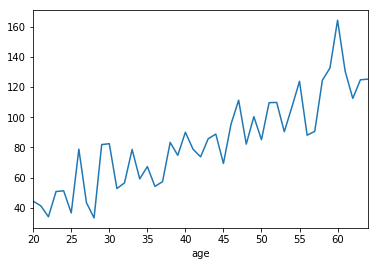

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

df3.plot()

```Save the result as a csv```

In [27]:
df3.to_csv("data.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df4 = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_numeric.csv')

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [30]:
# Oldest House:
print(df4[df4.YearBuilt == df4.YearBuilt.min()])


        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1349  1350          70         50.0     5250            8            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
1349       1872          1987         0.0         259  ...           0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
1349           54             20          0            0         0        0   

      MoSold  YrSold  SalePrice  
1349      12    2008     122000  

[1 rows x 38 columns]


In [31]:
# Highest price of houses in that year:
print((df4[df4.YearBuilt == df4.YearBuilt.min()]).SalePrice.max())

122000


In [32]:
# Mean area of houses
print(df4.LotArea.mean())

10516.828082191782


In [33]:
# 50 percentile
print(np.percentile(df4.LotArea, .5))

1680.0


In [34]:
# Which is more common, fireplace or not:
fireplaces = df4[df4.Fireplaces > 0]
print("with fireplaces are more common" if (len(fireplaces) >= 0.5*len(df4)) else "Without fireplaces are more common")

with fireplaces are more common


In [35]:
# Mean price of houses with swimming pools:
print((df4[df4.PoolArea > 0]).SalePrice.mean())

288138.5714285714


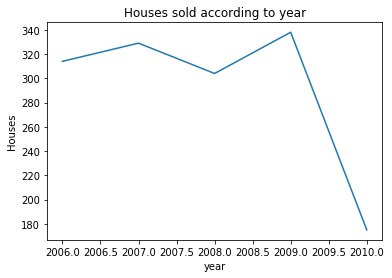

In [36]:
# Houses built over the years
grouped_by_year = df4.groupby("YrSold").groups

years = [k for k,v in grouped_by_year.items()]
counts = [len(v) for k,v in grouped_by_year.items()]

plt.figure()
plt.plot(years, counts)
plt.title("Houses sold according to year")
plt.xlabel("year")
plt.ylabel("Houses")
plt.show()

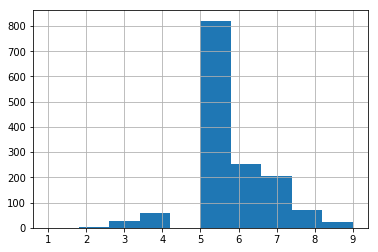

In [37]:
# Distribution of Overall Condition
df4['OverallCond'].hist()

In [38]:
# 
grouped_by_fireplaces = df4.groupby("Fireplaces")

for group in grouped_by_fireplaces:
    group_df = group[1]
    print("with %d fireplaces: mean price is %f, mean age is %f, and count of different baths number is %d" \
         % (group[0], group_df['SalePrice'].mean(), 2019 - group_df['YearBuilt'].mean(), len(group_df['FullBath'].unique())))

with 0 fireplaces: mean price is 141331.482609, mean age is 54.781159, and count of different baths number is 4
with 1 fireplaces: mean price is 211843.909231, mean age is 39.150769, and count of different baths number is 4
with 2 fireplaces: mean price is 240588.539130, mean age is 54.347826, and count of different baths number is 4
with 3 fireplaces: mean price is 252000.000000, mean age is 38.400000, and count of different baths number is 2


In [39]:
#
multiples_df = df4[(df4.MSSubClass > 60) & (df4.MSSubClass % 20 == 0)]
nonmultiples_df = df4[(df4.MSSubClass > 60) & (df4.MSSubClass % 20 != 0)]

print("multiples: mean is %f, max is %f, min is %f, std is %f" % (multiples_df.OverallQual.mean(),\
                                                                  multiples_df.OverallQual.max(), \
                                                                 multiples_df.OverallQual.min(),\
                                                                  multiples_df.OverallQual.std()))

print("nonmultiples: mean is %f, max is %f, min is %f, std is %f" % (nonmultiples_df.OverallQual.mean(),\
                                                                  nonmultiples_df.OverallQual.max(), \
                                                                 nonmultiples_df.OverallQual.min(),\
                                                                  nonmultiples_df.OverallQual.std()))

multiples: mean is 6.389908, max is 9.000000, min is 4.000000, std is 1.111021
nonmultiples: mean is 5.556180, max is 10.000000, min is 3.000000, std is 1.193055


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [40]:
df = pd.read_csv('house_prices_larger.csv')

FileNotFoundError: ignored

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df['LotAreaM2'] = df.apply(lambda row: 0.092903*row["LotArea"], axis=1)
df['TotalFlrSF'] = df.apply(lambda row: row['1stFlrSF'] + row['2ndFlrSF'], axis=1)
df['GarageAreaSqrt'] = df.apply(lambda row: (row['GarageArea'])**0.5, axis=1)
df['LotArea2'] = df.apply(lambda row: row['LotArea']/(row["BedroomAbvGr"] + 1), axis=1)
mean_df = df.groupby("YearBuilt").mean().reset_index().loc[:,["YearBuilt","LotArea"]]
temp = pd.merge(df, mean_df, on="YearBuilt")
df['LotArea3'] = temp["LotArea_x"]/(temp["LotArea_y"] + 1e-5)
df['LotAreaRank'] = df['LotArea'].rank()
df = pd.concat([df, pd.get_dummies(df['LotConfig'])], axis=1)



In [0]:
features = ['LotAreaM2', 'TotalFlrSF', 'GarageAreaSqrt', 'LotArea2', 'LotArea3', 'LotAreaRank', 'Corner', 'CulDSac', 'FR2', 'FR3', 'Inside']
df

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [0]:
feature_data = df.loc[:,features]
target = df["SalePrice"]

feature_train, feature_test, targer_train, targer_test = train_test_split(feature_data, target, test_size=0.3)

StandardScaler(feature_train)
StandardScaler(targer_train)

lin_regressor = LinearRegression()
lin_regressor.fit(feature_train, targer_train) 

price_train_fit = lin_regressor.predict(feature_train)
price = np.array(targer_train)
price_model = np.array(price_train_fit)
plt.scatter(price,price_model)
plt.title('Train Results')
plt.xlabel('real price')
plt.ylabel('model')
plt.show()

price_test_fit = lin_regressor.predict(feature_test)
price = np.array(targer_test)
price_model = np.array(price_test_fit)
plt.scatter(price,price_model)
plt.title('Test Results')
plt.xlabel('real price')
plt.ylabel('model')
plt.show()


```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)

feature_train_pol = poly.fit_transform(feature_train)
feature_test_pol = poly.fit_transform(feature_test)
score_train = np.zeros(30)
score_test = np.zeros(30)

for i in range(30):
  ridge_reg = Ridge(alpha=i , max_iter = 200)
  ridge_reg.fit(feature_train_pol, targer_train)
  price_train_fit = ridge_reg.predict(feature_train_pol)
  price_test_fit = ridge_reg.predict(feature_test_pol)
  score_train[i] = mean_squared_error(price_train_fit, targer_train)
  score_test[i] = mean_squared_error(price_test_fit, targer_test)
plt.scatter(range(30), score_train)
plt.ylim(np.min(score_train),np.max(score_train))
plt.title('Train Results')
plt.ylabel('MSE')
plt.xlabel('alpha value')
plt.show()

plt.scatter(range(30), score_test)
plt.ylim(np.min(score_test),np.max(score_test))
plt.title('Test Results')
plt.ylabel('MSE')
plt.xlabel('alpha value')
plt.show()
